<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/K_NEAREST_ALGORITHM_AND_ITS_PRACTICAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTUITION BEHIND KNN

It is mainly used for classification based problems but can be used in regression as well.

Here K represents the nearest neighbours we want to consider from a particular data point areanged in spatial dimensions say 2D, 3D or n dimensions...

After determining the K value the distance from the data point to its neighbours is calculated either using euclidian distance or manhattan distance.

Formula for Euclidian Distance---> d= [(x2-x1)**2 - (y2-y1)**2]**0.5

Formula for manhattan distance is the same as Pythagoras theorem for calculating the hypoteneuse---------> d**2= [(x2-x1)**2 - (y2-y1)**2]**0.5

After finding the distance the categories nearest to the datapoint are divided based on colors or other features in the graph.

Now the count of the categories in the neighbourhood is done and the category which dominates the other in terms of count is provided the nearest datapoint to be kept in his kitty....

#***point to be remembered is that the K value should always be odd because even K values will result in the equal distribution of the neighbourhood categories from the datapoint***.

#for regression
the new datapoint placed between all other datapoints. based on the value of k the nearest neighbours will be calculated and then the average of all these datapoints will correspond the value of the new data point....

#what are outliers?
Outliers are data points that are far from other data points. In other words, they're unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

#always remove the outliers and balance the dataset in k nearest neighbours....

#How to select the K value?






In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
df= pd.read_csv("/content/drive/My Drive/Data.csv", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [25]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

In [31]:
df.columns[5]

'QWG'

In [0]:
#Note: index_col=0 can be used to force pandas to not use the first column as the index, e.g. when you have a malformed file with delimiters at the end of each line. Return a subset of the columns.

In [0]:
from sklearn.preprocessing import StandardScaler

In [12]:
df2= df.drop("TARGET CLASS", axis=1)
df2.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [0]:
scaler= StandardScaler()

In [18]:
df_feat= scaler.fit_transform(df2)
df_feat

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [32]:
df_new= pd.DataFrame(df_feat, index=None, columns=df.columns[:-1])
df_new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


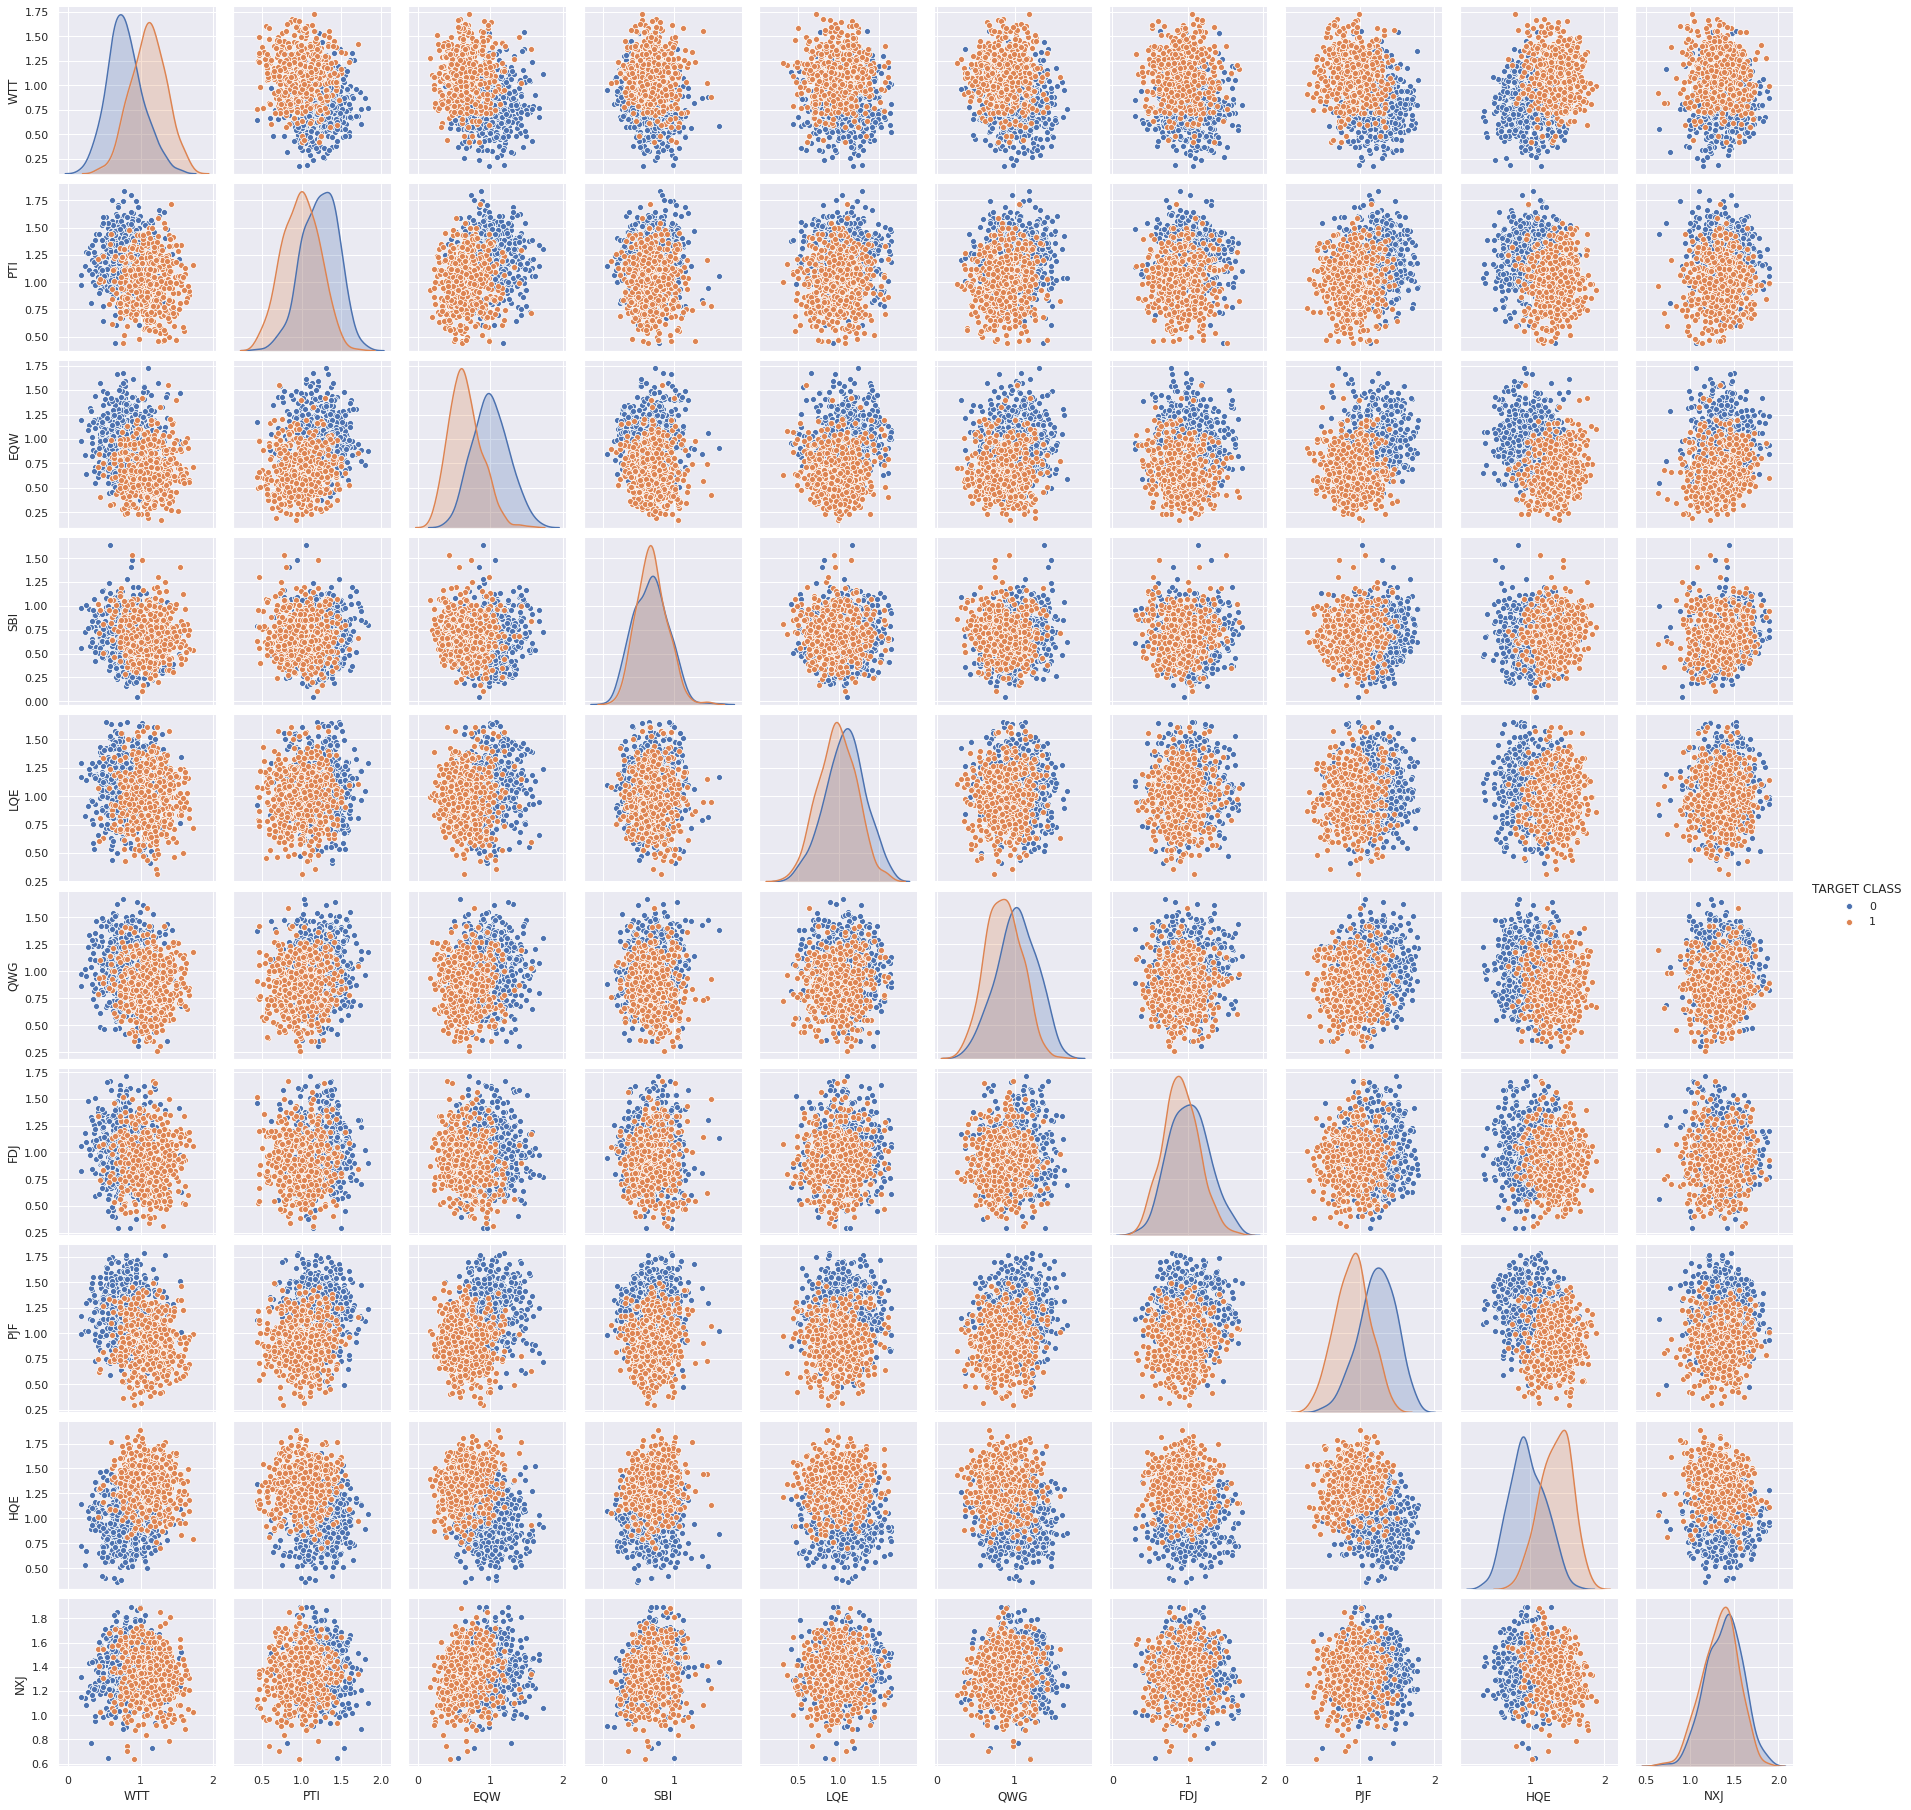

In [33]:
sns.pairplot(df, hue="TARGET CLASS")

In [0]:
#PAIR PLOT IS USED TO SHOW THE DISTRIBUTION OF DATAPOINTS IN THE N DIMENSIONAL SPACE

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_new, df["TARGET CLASS"], test_size=0.3, random_state=10)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn= KNeighborsClassifier(n_neighbors=1)


In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred= knn.predict(X_test)

In [43]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
cm= confusion_matrix(y_test, pred)
cm

array([[152,  17],
       [  9, 122]])

In [48]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.90      0.92       169\n           1       0.88      0.93      0.90       131\n\n    accuracy                           0.91       300\n   macro avg       0.91      0.92      0.91       300\nweighted avg       0.92      0.91      0.91       300\n'

In [0]:
#choosing the right value of K

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
accuracy_rate=[]

for i in range(1,40):

  knn= KNeighborsClassifier(n_neighbors=i)
  score= cross_val_score(knn, df_new, df["TARGET CLASS"], cv=10)
  accuracy_rate.append(score.mean())


In [62]:
len(accuracy_rate)

39

In [0]:
error_rate=[]
for i in range(1,40):

  knn= KNeighborsClassifier(n_neighbors=i)
  score= cross_val_score(knn, df_new, df["TARGET CLASS"], cv=10)
  error_rate.append(1-score.mean())


In [63]:
len(error_rate)

39

In [0]:
#while plotting the graph between k and error rate or accuracy rate k will be in x axis always

In [0]:
import matplotlib.pyplot as plt


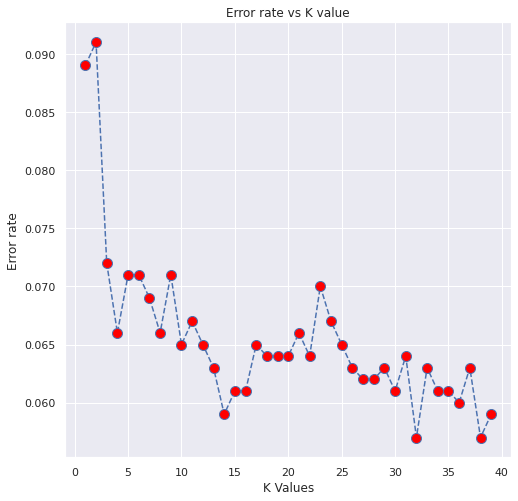

In [69]:
plt.figure(figsize=(8,8))
plt.plot(range(1,40), error_rate, color="b", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K Values")
plt.ylabel("Error rate")
plt.show()

In [0]:
#here we can see that after the value of 25 the error value is only reducing so taking the value of K as 23 will be feasible